#### Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
from scipy import stats
import matplotlib.pyplot as plt

#### Loading the Datasets

In [2]:
train = pd.read_csv('train_jqd04QH.csv')
test = pd.read_csv('test_KaymcHn.csv')
sample=pd.read_csv('sample_submission_sxfcbdx.csv')

#### Understanding the data

In [3]:
train.shape,test.shape

((18359, 14), (15021, 13))

In [4]:
train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0


###### train.apply(lambda x: (len(x.unique()), [x.unique()])) # To find the unique values and length of unique values

In [5]:
train.apply(lambda x: (len(x.unique()))) 

enrollee_id               18359
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
target                        2
dtype: int64

In [6]:
test.apply(lambda x: (len(x.unique())))

enrollee_id               15021
city                        123
city_development_index       93
gender                        4
relevent_experience           2
enrolled_university           4
education_level               6
major_discipline              7
experience                   23
company_size                  9
company_type                  7
last_new_job                  7
training_hours              241
dtype: int64

In [7]:
test.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

In [8]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

#### EDA
**Target Exploration**

In [9]:
train['target'].value_counts(normalize=True)

0    0.867912
1    0.132088
Name: target, dtype: float64

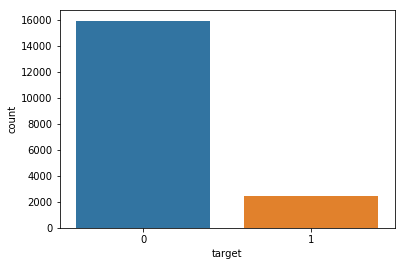

In [10]:
sns.countplot(train['target'])

#### Univariate Analysis

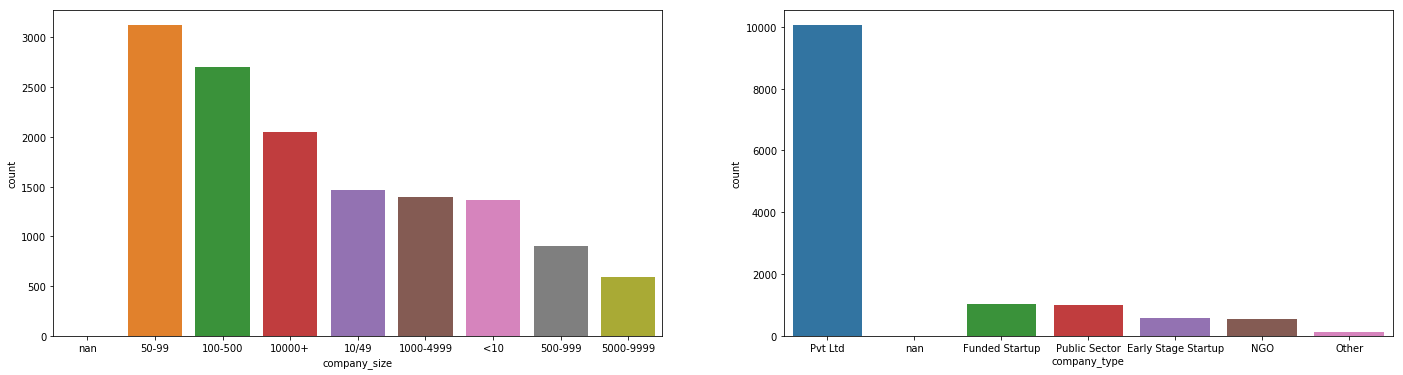

In [11]:
plt.figure(figsize=(24, 6))
plt.subplot(121)
sns.countplot(train['company_size'],order = train['company_size'].value_counts(dropna=False).index)
plt.subplot(122)
sns.countplot(train['company_type'],order = train['company_type'].value_counts(dropna=False).index)

##### The Missing Value is greater than any of sum of other values, it is consider as seperate variable

In [12]:
train['company_size'].fillna('unknown', inplace=True)
test['company_size'].fillna('unknown', inplace=True)

Male      12884
NaN        4098
Female     1188
Other       189
Name: gender, dtype: int64

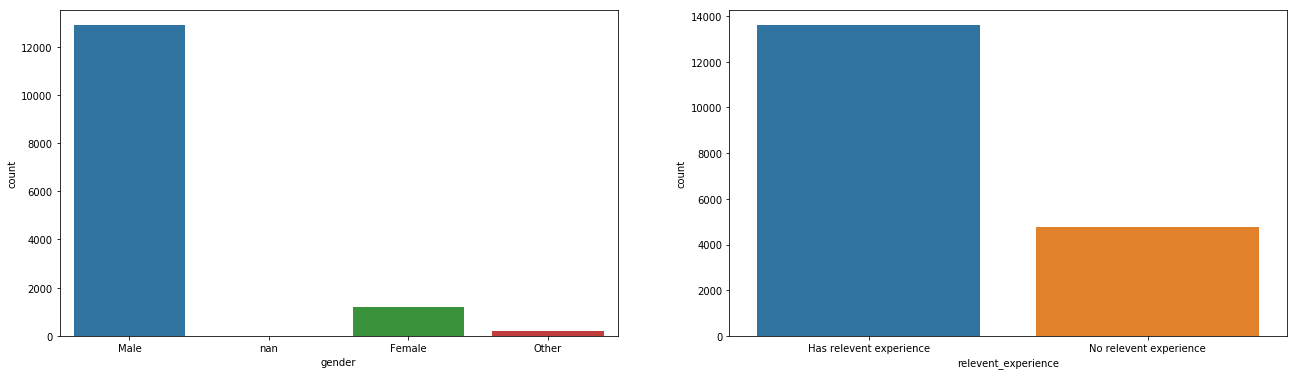

In [13]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.countplot(train['gender'],order = train['gender'].value_counts(dropna=False).index)
display(train['gender'].value_counts(dropna=False))
plt.subplot(122)
sns.countplot(train['relevent_experience'],order = train['relevent_experience'].value_counts(dropna=False).index)

##### As the data contains Almost 90% of males, Nan Values can be replaces as Males, else we can use Not revelaed 

In [14]:
train['gender'].fillna('Male', inplace=True)
test['gender'].fillna('Male', inplace=True)

##### Adding Not Revealed is not showing any improvements, So I have gone for Mode of Gender(Male)

*train['gender'].fillna('Not_Revelaed', inplace=True)*

*test['gender'].fillna('Not_Revelaed', inplace=True)*

In [15]:
train["gender"] = train["gender"].map({'Male':2,  'Female':1, 'Other':0})
test["gender"] = test["gender"].map({'Male':2,  'Female':1, 'Other':0})

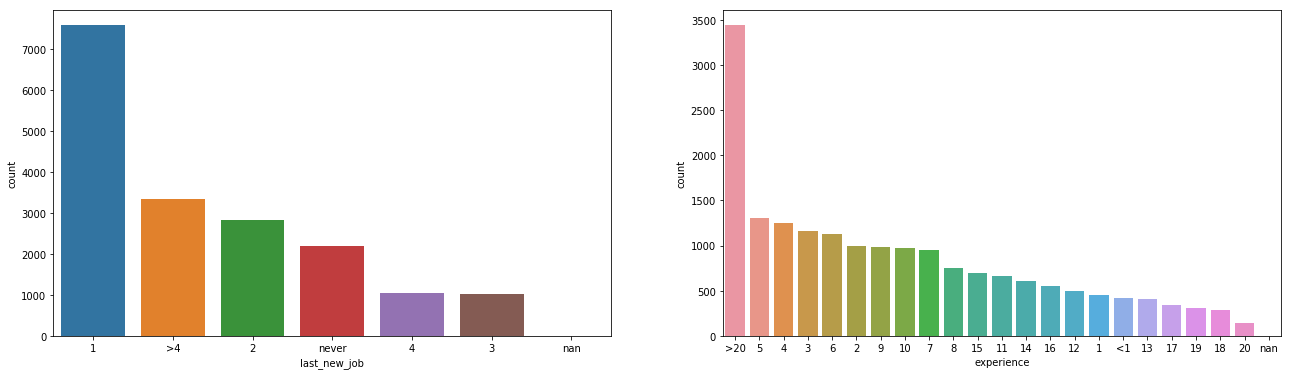

In [16]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.countplot(train['last_new_job'],order = train['last_new_job'].value_counts(dropna=False).index)
plt.subplot(122)
sns.countplot(train['experience'],order = train['experience'].value_counts(dropna=False).index)

###### As the data contains last_new_job as 1 Year have higher count, Nan Values can be replaces as 1 & Also Replacing '>4' and 'never' as numerical values

In [17]:
train['last_new_job'].fillna('1', inplace=True)
test['last_new_job'].fillna('1', inplace=True)

In [18]:
train['last_new_job'].replace('>4','6', inplace=True)
train['last_new_job'].replace('never','0' ,inplace=True)
train['last_new_job']=train['last_new_job'].astype(int)
test['last_new_job'].replace('>4','6', inplace=True)
test['last_new_job'].replace('never','0' ,inplace=True)
test['last_new_job']=test['last_new_job'].astype(int)

###### Similar to 'last_new_job', relacing Nan with Mode, and changing to integers

In [19]:
train['experience'].fillna('>20', inplace=True)
test['experience'].fillna('>20', inplace=True)

In [20]:
train['experience'].replace('>20','25', inplace=True)
train['experience'].replace('<1','0' ,inplace=True)
train['experience']=train['last_new_job'].astype(int)
test['experience'].replace('>20','25', inplace=True)
test['experience'].replace('<1','0' ,inplace=True)
test['experience']=test['last_new_job'].astype(int)

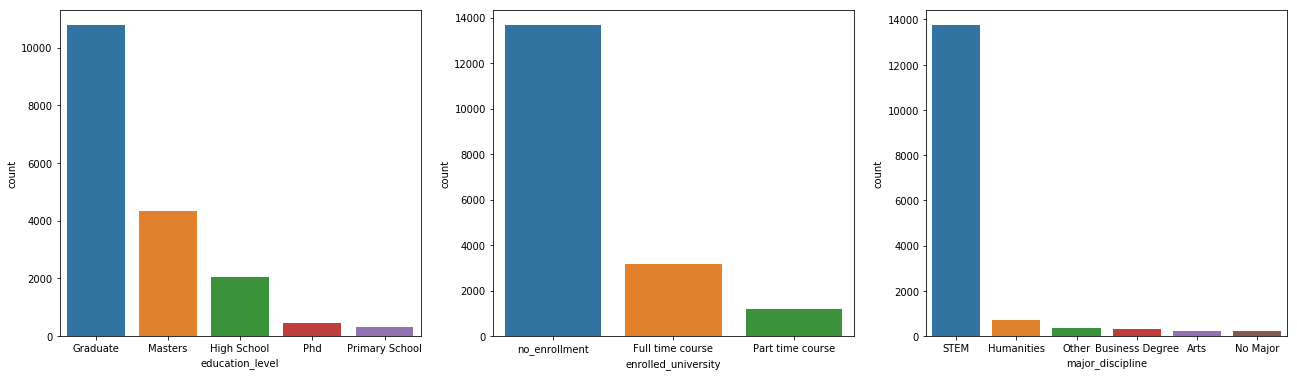

In [21]:
plt.figure(figsize=(22, 6))
plt.subplot(131)
sns.countplot(train['education_level'],order = train['education_level'].value_counts().index)
plt.subplot(132)
sns.countplot(train['enrolled_university'],order = train['enrolled_university'].value_counts().index)
plt.subplot(133)
sns.countplot(train['major_discipline'],order = train['major_discipline'].value_counts().index)

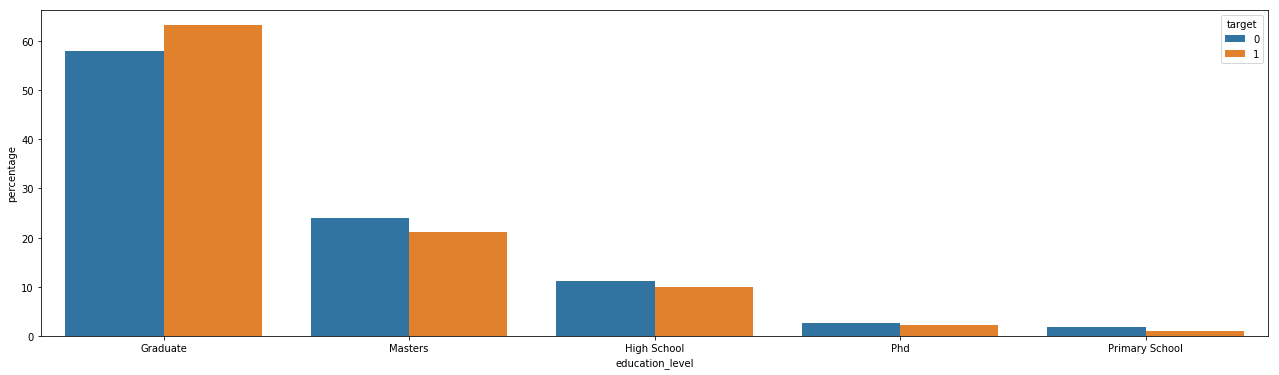

In [22]:
plt.figure(figsize=(22, 6))
city_tier_counts = (train.groupby(['target'])['education_level'].value_counts(dropna=False,normalize=True).rename('percentage').mul(100).reset_index().sort_values('target'))
sns.barplot(x="education_level", y="percentage", hue="target", data=city_tier_counts)

In [23]:
train['education_level'].fillna(train['education_level'].mode()[0], inplace=True)
test['education_level'].fillna(test['education_level'].mode()[0], inplace=True)

train["education_level"] = train["education_level"].map({'Graduate':0, 'Masters':1, 'High School':2, 'Phd':3, 'Primary School':4})
test["education_level"] = test["education_level"].map({'Graduate':0, 'Masters':1, 'High School':2, 'Phd':3, 'Primary School':4})

C:\Users\SJMB\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


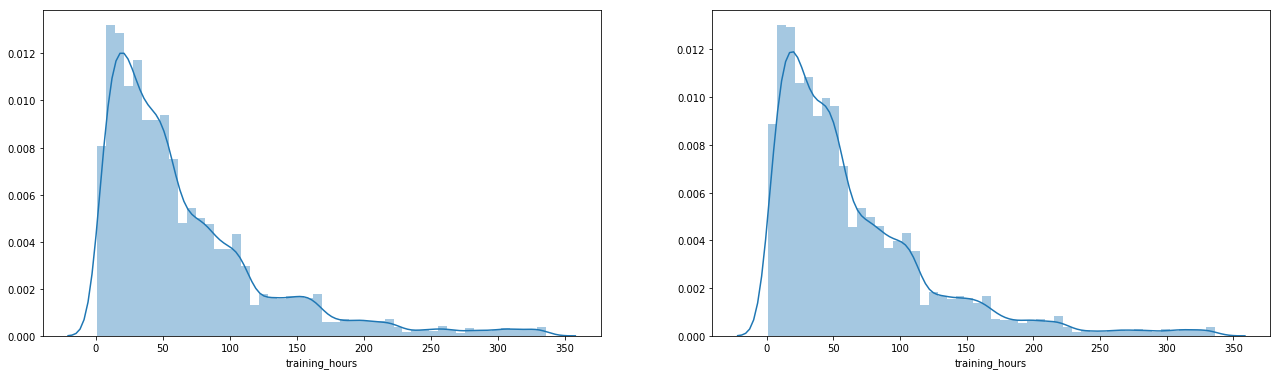

In [24]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
sns.distplot(train['training_hours'],kde = True,bins=50)
plt.subplot(122)
sns.distplot(test['training_hours'],kde = True,bins=50)

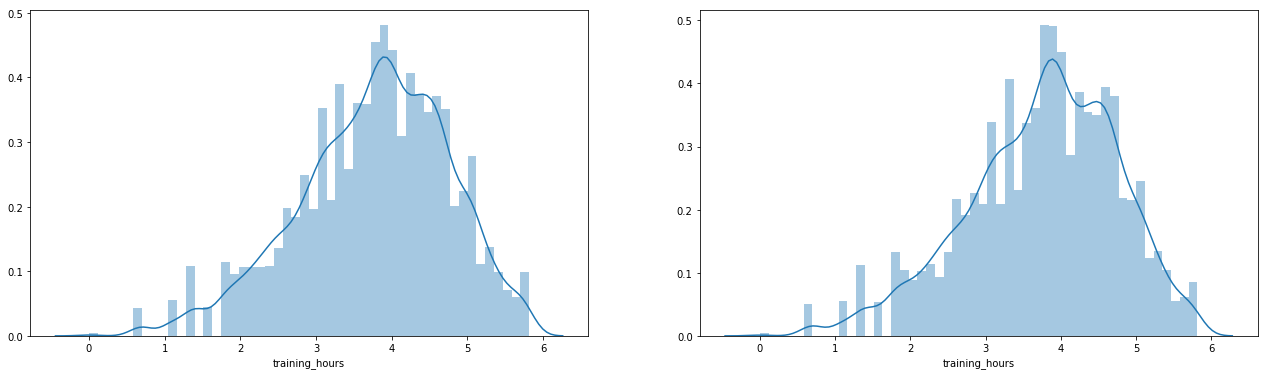

In [25]:
plt.figure(figsize=(22, 6))
plt.subplot(121)
train['training_hours']=np.log(train['training_hours'])
sns.distplot(train['training_hours'],kde = True,bins=50)
plt.subplot(122)
test['training_hours']=np.log(test['training_hours'])
sns.distplot(test['training_hours'],kde = True,bins=50)

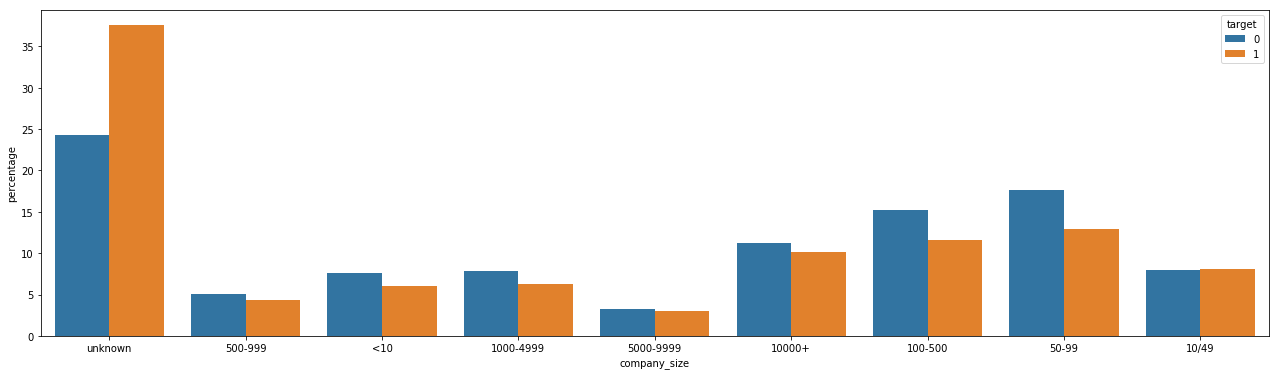

In [26]:
plt.figure(figsize=(22, 6))
city_tier_counts = (train.groupby(['target'])['company_size'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('target'))
sns.barplot(x="company_size", y="percentage", hue="target", data=city_tier_counts)

###### From it is infered that, who are not revealed the number employees, having high attriation rate

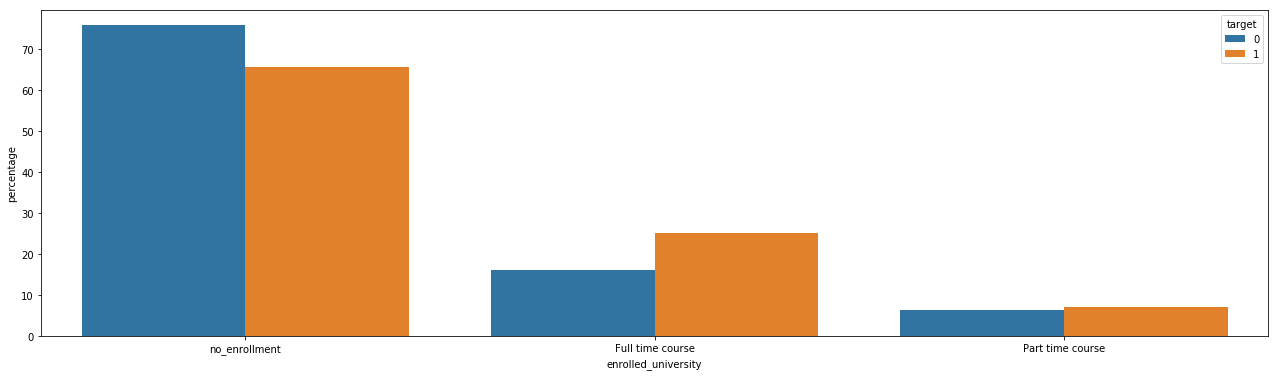

In [27]:
plt.figure(figsize=(22, 6))
city_tier_counts = (train.groupby(['target'])['enrolled_university'].value_counts(dropna=False,normalize=True).rename('percentage').mul(100).reset_index().sort_values('target'))
sns.barplot(x="enrolled_university", y="percentage", hue="target", data=city_tier_counts)

In [28]:
train['enrolled_university'].fillna(train['enrolled_university'].mode()[0], inplace=True)
test['enrolled_university'].fillna(test['enrolled_university'].mode()[0], inplace=True)

In [29]:
train["enrolled_university"] = train["enrolled_university"].map({'no_enrollment':1, 'Full time course':4, 'Part time course':2})
test["enrolled_university"] = test["enrolled_university"].map({'no_enrollment':1, 'Full time course':4, 'Part time course':2})

###### Concating the test and train dataframe

In [30]:
df=pd.concat([train,test],0)

###### I have tried to extract the Number from the city variable to use a separate variable, But it's not good while building the model

*train["city_num"] = train["city"].str.extract("(\d+)")

*train["city_num"] = train["city_num"].astype(int)

*test["city_num"] = test["city"].str.extract("(\d+)")

*test["city_num"] = test["city_num"].astype(int)

###### Tried to create the city_development_index as bins , but it does it improved the auc score of the model much

*bin_ranges = [.4,0.5,0.7,0.85,0.9,0.91,0.92,0.94,0.95]*

*bin_names = [1, 2, 3,4,5,6,7,8]*

*train['CDIL_Label'] = pd.cut(np.array(train['city_development_index']), bins=bin_ranges,  labels=bin_names)*

*train['CDIL_Label']=train['CDIL_Label'].astype(int)*

*test['CDIL_Label'] = pd.cut(np.array(test['city_development_index']), bins=bin_ranges,  labels=bin_names)*

*test['CDIL_Label']=test['CDIL_Label'].astype(int)*

#### Missing Value Treatement

In [31]:
Missing_Variables=df.columns[df.isnull().any()]

In [32]:
Missing_Variables=Missing_Variables.tolist()
Missing_Variables.remove('target')
Missing_Variables

['major_discipline', 'company_type']

###### These Missing Variable can be replace mode, because of the Percentange of category is more than 90% than rmaining data

In [33]:
for object in Missing_Variables:
    df[object].fillna(df[object].mode()[0], inplace=True)

In [34]:
df.isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                        0
relevent_experience           0
enrolled_university           0
education_level               0
major_discipline              0
experience                    0
company_size                  0
company_type                  0
last_new_job                  0
training_hours                0
target                    15021
dtype: int64

In [35]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,2,Has relevent experience,1,0,STEM,1,100-500,Pvt Ltd,1,4.663439,0.0
1,29166,city_83,0.923,2,Has relevent experience,1,0,STEM,1,<10,Funded Startup,1,4.234107,0.0
2,46,city_16,0.910,2,Has relevent experience,1,0,STEM,2,50-99,Public Sector,2,1.386294,0.0
3,18527,city_64,0.666,2,Has relevent experience,1,0,STEM,1,50-99,Pvt Ltd,1,3.258097,0.0
4,21751,city_100,0.887,2,No relevent experience,1,1,STEM,2,unknown,Pvt Ltd,2,4.477337,1.0


#### Label Encoding

In [36]:
cat_col = df.dtypes.loc[df.dtypes=='object'].index
categorical_variables=cat_col.tolist()
categorical_variables

['city',
 'relevent_experience',
 'major_discipline',
 'company_size',
 'company_type']

In [37]:
categorical_variables=['city'] # Only City have more unique Values, it better to Labelencoding instead of OHE
from sklearn import metrics, preprocessing, model_selection
for col in categorical_variables:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[col].values.astype('str')))
    df[col] = lbl.transform(list(df[col].values.astype('str')))

city


In [38]:
num_col = df.dtypes.loc[df.dtypes!='object'].index
num_col=num_col.tolist()
num_col

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'enrolled_university',
 'education_level',
 'experience',
 'last_new_job',
 'training_hours',
 'target']

In [39]:
num_col.remove('enrollee_id') # Unique_id
print(num_col)
target_col = ['target']

['city', 'city_development_index', 'gender', 'enrolled_university', 'education_level', 'experience', 'last_new_job', 'training_hours', 'target']


###### Features that have to be used for One Hot Encoding

In [40]:
OHE=[ 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']

##### I am removing the Values with less count to avoid dummy variable trap while doing OHE

In [41]:
df = pd.concat([df, pd.get_dummies(df["gender"], prefix="gender_")], axis=1)

In [42]:
df.gender.value_counts()

2    30948
1     2085
0      347
Name: gender, dtype: int64

In [43]:
df.drop('gender__0',1,inplace=True)

In [44]:
df = pd.concat([df, pd.get_dummies(df["relevent_experience"], prefix="re_")], axis=1)

In [45]:
df.drop('re__No relevent experience',1,inplace=True)

In [46]:
df = pd.concat([df, pd.get_dummies(df["enrolled_university"], prefix="eu_")], axis=1)

In [47]:
df.enrolled_university.value_counts()

1    25508
4     5752
2     2120
Name: enrolled_university, dtype: int64

In [48]:
df.drop('eu__2',1,inplace=True)

In [49]:
df = pd.concat([df, pd.get_dummies(df["education_level"], prefix="el_")], axis=1)

In [50]:
df.education_level.value_counts()

0    20364
1     7797
2     3708
3      881
4      630
Name: education_level, dtype: int64

In [51]:
df.drop('el__4',1,inplace=True)

In [52]:
df = pd.concat([df, pd.get_dummies(df["major_discipline"], prefix="md_")], axis=1)

In [53]:
df.major_discipline.value_counts()

STEM               30086
Humanities          1212
Other                678
Business Degree      585
Arts                 432
No Major             387
Name: major_discipline, dtype: int64

In [54]:
df.drop('md__No Major',1,inplace=True)

In [55]:
df = pd.concat([df, pd.get_dummies(df["company_size"], prefix="CS_")], axis=1)

In [56]:
df.company_size.value_counts()

unknown      8830
50-99        5697
100-500      4845
10000+       3666
10/49        2664
1000-4999    2513
<10          2464
500-999      1639
5000-9999    1062
Name: company_size, dtype: int64

In [57]:
df.drop('CS__5000-9999',1,inplace=True)

In [58]:
df = pd.concat([df, pd.get_dummies(df["company_type"], prefix="CT_")], axis=1)

In [59]:
df.company_type.value_counts()

Pvt Ltd                27483
Funded Startup          1880
Public Sector           1792
Early Stage Startup     1029
NGO                      973
Other                    223
Name: company_type, dtype: int64

In [60]:
df.drop('CT__Other',1,inplace=True)

In [61]:
train_features = df.drop(['enrollee_id', 'target', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'], axis = 1)[:18359]
target = df['target'][:18359]
test_features = df.drop(['enrollee_id','target', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type'], axis = 1)[18359:]

In [62]:
train_features.shape,target.shape,test_features.shape

((18359, 32), (18359,), (15021, 32))

#### Model Building

In [63]:
from sklearn import metrics, preprocessing, model_selection
from sklearn.model_selection import train_test_split
import lightgbm as lgb
#X_train, X_test, y_train, y_test = train_test_split(train_features, target, test_size=0.3, random_state = 25)

In [64]:
train_X=train_features
train_y=target
test_X=test_features

In [65]:
def runLGB(train_X, train_y, test_X, test_y=None, test_X2=None, dep=8, seed=0, data_leaf=200):
    params = {}
    params["objective"] = "binary"
    params['metric'] = 'auc'
    params["max_depth"] = dep
    params["num_leaves"] = 31
    params["min_data_in_leaf"] = data_leaf
    params["learning_rate"] = 0.01
    params["bagging_fraction"] = 0.9
    params["feature_fraction"] = 0.5
    params["feature_fraction_seed"] = seed
    params["bagging_freq"] = 1
    params["bagging_seed"] = seed
    params["lambda_l2"] =5
    params["lambda_l1"] = 5
    params["verbosity"] = -1
    num_rounds = 25000

    plst = list(params.items())
    lgtrain = lgb.Dataset(train_X, label=train_y)

    if test_y is not None:
        lgtest = lgb.Dataset(test_X, label=test_y)
        model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=200, verbose_eval=500)
    else:
        lgtest = lgb.DMatrix(test_X)
        model = lgb.train(params, lgtrain, num_rounds)

    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_test_y2 = model.predict(test_X2, num_iteration=model.best_iteration)

    loss = 0
    if test_y is not None:
        loss = metrics.roc_auc_score(test_y, pred_test_y)
        print(loss)
        return model, loss, pred_test_y, pred_test_y2
    else:
        return model, loss, pred_test_y, pred_test_y2

In [66]:
print("Building model..")
cv_scores = []
pred_test_full = 0
pred_train = np.zeros(train_X.shape[0])
n_splits = 3
#kf = model_selection.KFold(n_splits=n_splits, shuffle=True, random_state=7988)
gkf = model_selection.GroupKFold(n_splits=n_splits)
model_name = "lgb"
for dev_index, val_index in gkf.split(train_X, df['target'][:18359].values, df['enrollee_id'][:18359].values):
    dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val = 0
    pred_test = 0
    n_models = 0.

    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=8, seed=2019)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=7, data_leaf=100, seed=9873)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    model, loss, pred_v, pred_t = runLGB(dev_X, dev_y, val_X, val_y, test_X, dep=9, data_leaf=150, seed=4568)
    pred_val += pred_v
    pred_test += pred_t
    n_models += 1
    
    pred_val /= n_models
    pred_test /= n_models
    
    loss = metrics.roc_auc_score(val_y, pred_val)
        
    pred_train[val_index] = pred_val
    pred_test_full += pred_test / n_splits
    cv_scores.append(loss)
#     break
print(np.mean(cv_scores))

Building model..
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[185]	valid_0's auc: 0.657636
0.6576364564439908
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[137]	valid_0's auc: 0.658252
0.6582523390104843
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[11]	valid_0's auc: 0.658414
0.658413887824973
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[292]	valid_0's auc: 0.662836
0.6628360856031704
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[291]	valid_0's auc: 0.662466
0.6624659432023188
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[182]	valid_0's auc: 0.664062
0.6640618068494366
Training until validation scores don't improve for 200 rounds
[500]	valid_0's auc: 0.658981
Early stopping, b

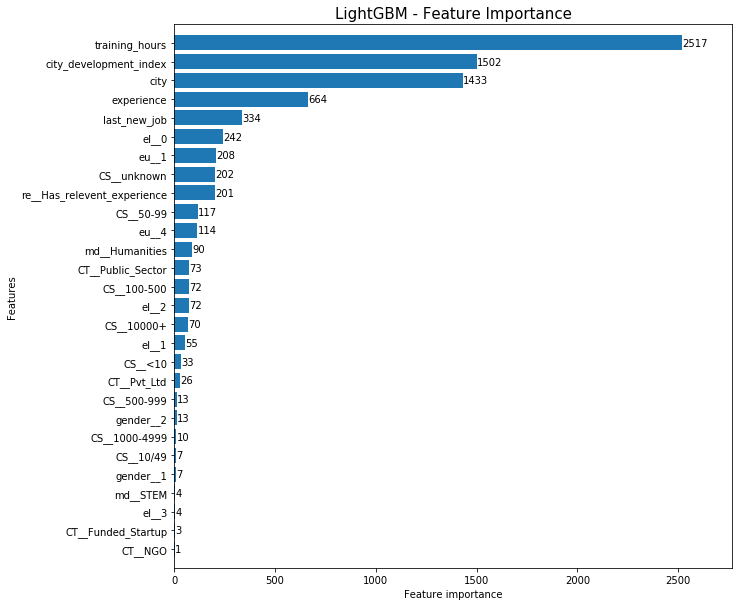

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
lgb.plot_importance(model, max_num_features=100, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [68]:
sample["target"] = pred_test_full
sample.to_csv("Solution.csv", index=False)

##### *After the Results I have found that I have done almost similar in Feature Engineering, Treating missing Values, But Have to show improvement in Grid Search, CrossValidation and Model Building*